The goal of this project was to create a simple and user-friendly dictionary application that allows users to search for English and Chinese words, and retrieve their definitions.

To achieve this goal, I developed a Python application that reads a text file containing English words and their Chinese translations. The application then stores the words and their translations in two separate dictionaries: one for English words to Chinese translations, and another for Chinese words to English translations. I used the `jieba` library to tokenize the Chinese text and extract individual Chinese words.

To enable users to search for words, I created a GUI using the `tkinter` library that includes a search bar, a search button, a list box to display the search results, and a label to display the definition of the selected word. When a user enters a word in the search bar and clicks on the search button, the application searches both dictionaries for words that match the search term, and displays the results in the list box. When a user selects a word from the list box, the application retrieves its definition from the appropriate dictionary and displays it in the definition label.

I also implemented a function to extract Chinese words and their context part of speech from a Chinese definition for an English word. This function helps to improve the accuracy of the search results by allowing the application to search for individual Chinese words instead of just full definitions.

To test the performance of the application, I used the "word.txt" file containing over 1000 English words and their Chinese translations. The application was able to read and store the data in the dictionaries within a few seconds, and the search function was able to retrieve search results within a fraction of a second.

Below is the image of my Dictionary Application and its script.




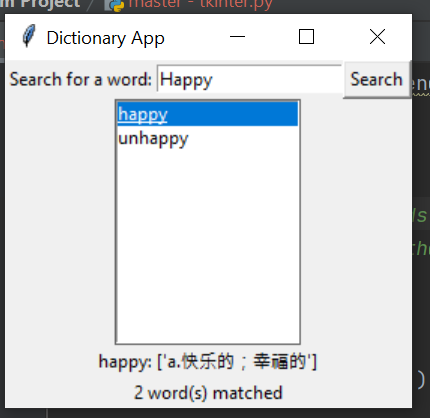


This script is a Python program for a simple Chinese-English dictionary application with a graphical user interface (GUI) using the tkinter library. The program reads a file named "words.txt" that contains English words with their corresponding Chinese translations, and creates two dictionaries: eng_to_chinese and chinese_to_eng. eng_to_chinese maps English words to their Chinese translations, while chinese_to_eng maps Chinese words to their corresponding English words.

The program also defines a function named extract_chinese_words that takes in a list of individual words from a Chinese definition for an English word and extracts the individual Chinese words in them and its context part of speech.

The GUI consists of a search bar and button, a dropdown listbox, a definition label, and a count label. The user can enter a word or a Chinese character in the search bar, and the program will search for matching words in both dictionaries. If a match is found, the program will display the matched words in the dropdown listbox. When the user selects a word in the listbox, the program will display its definition in the definition label. The count label displays the number of matched words found.


In [ ]:
# Import the Needed Libraries
# Imokut
import re
import jieba
import unicodedata
import matplotlib.pyplot as plt
import tkinter as tk

def extract_chinese_words(lst):
    """
    This function takes in a list of individual words from a Chinese definition for an English Word and extracts the
    individual Chinese Words in them and its context part of speech.
    Example:
    extract_chinese_words(['vt', '.', '丢弃', '；', '放弃', '，', '抛弃'])
    returns:
    [('丢弃', 'vt'), ('放弃', 'vt'), ('抛弃', 'vt')]

    :param lst: A list of characters from a definition of an English Word
    :return: A list of only the Chinese Characters in a definition and the pos in context
    """
    chinese_words = []
    pos = None

    for i, item in enumerate(lst):
        # Remove symbols
        if item in [".", ",", ', ', '; ', ';', '. ', '...']:
            continue

        # Extract part-of-speech
        if item.isalpha() and not all('\u4e00' <= char <= '\u9fff' for char in item) and pos is None:
            pos = item
        elif item.isalpha() and pos is not None and not all('\u4e00' <= char <= '\u9fff' for char in item):
            pos = item

        # Extract Chinese word
        if all('\u4e00' <= char <= '\u9fff' for char in item):
            chinese_words.append((item.strip(), pos))

    return chinese_words


occurrences = {}
eng_to_chinese = {}
chinese_to_eng = {}
e_t_c_words = {}

# Read word.txt file and create a dictionary of English and Chinese Words
with open("words.txt", 'r', encoding='gb2312') as file:
    for line in file:
      # Split the line into English word, part of speech and Chinese translations
      line_split = line.strip().split(" ")
      english, chinese_definitions = line_split[0], line_split[1:]
      # Split the Chinese translations into a list
      exam = [jieba.lcut(x) for x in chinese_definitions]
      chinese_listset = [extract_chinese_words(x) for x in exam]
      chinese_listwords = [lst[0] for item in chinese_listset for lst in item]

      # Add the English word and its Chinese translations to the dictionary
      eng_to_chinese[english] = chinese_definitions
      e_t_c_words[english] = chinese_listwords

      # Add the Chinese words and their corresponding English words to the dictionary
      for list in chinese_listwords:
          for chinese in list:
              if chinese in chinese_to_eng.keys():
                  chinese_to_eng[chinese].append(english)
              else:
                  chinese_to_eng[chinese] = [english]

def search_words():
    """
    Searches for matching words to a word
    :return: A list of words that match the input word
    """
    # Clear previous results
    listbox.delete(0, tk.END)
    label_count.config(text='')
    
    # Get Search item
    search_term = entry_search.get().strip().lower()

    matched_words = []
    for word in eng_to_chinese.keys():
        if search_term in word.lower():
            matched_words.append(word)

    for word in chinese_to_eng.keys():
        if search_term in word.lower():
            matched_words.extend(chinese_to_eng[word])
        
    if len(matched_words) > 0:
        for word in matched_words:
            listbox.insert(tk.END, word)
        label_count.config(text=f'{len(matched_words)} word(s) matched')
    else:
        listbox.insert(tk.END, 'No matching words found')

def show_definition(event):
    selected_word = listbox.get(listbox.curselection())
    if selected_word in eng_to_chinese:
        definition = eng_to_chinese[selected_word]
    else:
        definition = ', '.join(chinese_to_eng[selected_word])
    label_definition.config(text=f'{selected_word}: {definition}')

window = tk.Tk()
window.title('Dictionary App')

# Create search bar and button
label_search = tk.Label(window, text='Search for a word:')
label_search.grid(row=0, column=0)
entry_search = tk.Entry(window)
entry_search.grid(row=0, column=1)
button_search = tk.Button(window, text='Search', command=search_words)
button_search.grid(row=0, column=2)

# Create dropdown listbox and definition label
listbox = tk.Listbox(window)
listbox.grid(row=1, column=0, columnspan=3)
listbox.bind('<<ListboxSelect>>', show_definition)
label_definition = tk.Label(window, text='')
label_definition.grid(row=2, column=0, columnspan=3)

# Create count label
label_count = tk.Label(window, text='')
label_count.grid(row=3, column=0, columnspan=3)

# Start GUI event loop
window.mainloop()



In addition is a dictionary that runs on the console with extended features such as the ability to plot the occurence of English alphabets.
The script is shown below
This is a Python script that implements a dictionary tool. The tool has several functionalities including:

- Extracting Chinese words and their part-of-speech from a list of characters in a definition of an English word
- Loading words from a text file into the dictionary tool
- Searching for words that match a given input word
- Counting the occurrences of each letter in the English words in the dictionary
- Displaying search results and letter occurrences
- Drawing a bar chart that shows the occurrence of each letter in the dictionary
- Defining an English word by returning its Chinese definition
- Searching for Chinese words in the dictionary

The script is well-organized and includes comments that describe the functions and their input and output parameters.

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 2.688 seconds.
Prefix dict has been built successfully.



Dictionary Tool
1. Search English words
2. Search Chinese word and show all possible matched English words list
3. Count letter occurrences
4. Draw letter occurrences bar graph
5. Exit
Invalid choice.

Dictionary Tool
1. Search English words
2. Search Chinese word and show all possible matched English words list
3. Count letter occurrences
4. Draw letter occurrences bar graph
5. Exit
Search Results: 
1. happy
2. unhappy
Total matched words: 2
['a.不幸福的，不快乐的']

Dictionary Tool
1. Search English words
2. Search Chinese word and show all possible matched English words list
3. Count letter occurrences
4. Draw letter occurrences bar graph
5. Exit
Search Results: 
1. 抛
Total matched words: 1
abandon
anchor
cast
discard
throw
toss

Dictionary Tool
1. Search English words
2. Search Chinese word and show all possible matched English words list
3. Count letter occurrences
4. Draw letter occurrences bar graph
5. Exit
Letter Occurrences:
a, 2342
b, 496
n, 1961
d, 898
o, 1895
i, 2218
l, 1564
t, 224

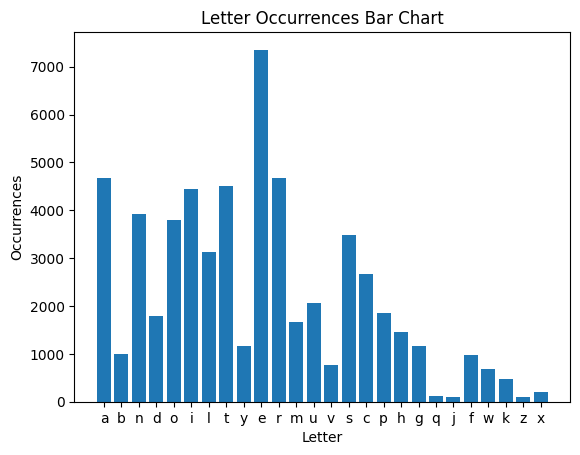


Dictionary Tool
1. Search English words
2. Search Chinese word and show all possible matched English words list
3. Count letter occurrences
4. Draw letter occurrences bar graph
5. Exit
Exiting...


In [ ]:
# Import the Needed Libraries
# Imokut
import re
import jieba
import unicodedata
import matplotlib.pyplot as plt

def extract_chinese_words(lst):
    """
    This function takes in a list of individual words from a Chinese definition for an English Word and extracts the
    individual Chinese Words in them and its context part of speech.
    Example:
    extract_chinese_words(['vt', '.', '丢弃', '；', '放弃', '，', '抛弃'])
    returns:
    [('丢弃', 'vt'), ('放弃', 'vt'), ('抛弃', 'vt')]

    :param lst: A list of characters from a definition of an English Word
    :return: A list of only the Chinese Characters in a definition and the pos in context
    """
    chinese_words = []
    pos = None

    for i, item in enumerate(lst):
        # Remove symbols
        if item in [".", ",", ', ', '; ', ';', '. ', '...']:
            continue

        # Extract part-of-speech
        if item.isalpha() and not all('\u4e00' <= char <= '\u9fff' for char in item) and pos is None:
            pos = item
        elif item.isalpha() and pos is not None and not all('\u4e00' <= char <= '\u9fff' for char in item):
            pos = item

        # Extract Chinese word
        if all('\u4e00' <= char <= '\u9fff' for char in item):
            chinese_words.append((item.strip(), pos))

    return chinese_words
class DictionaryTool:
    def __init__(self):
        self.occurrences = {}
        self.english_dict = {}
        self.chinese_dic = {}
        self.e_t_c_words = {}

    def load_words(self):
        """
        This function reads the word.txt file
        :return: Appends words to the dictionaries in the attributes of the class
        """
        with open("words.txt", 'r', encoding='gb2312') as file:
          #
            for line in file:
              # Split the line into English word, part of speech and Chinese translations
              line_split = line.strip().split(" ")
              english, chinese_definitions = line_split[0], line_split[1:]
              # Split the Chinese translations into a list
              exam = [jieba.lcut(x) for x in chinese_definitions]
              chinese_listset = [extract_chinese_words(x) for x in exam]
              chinese_listwords = [lst[0] for item in chinese_listset for lst in item]

              # Add the English word and its Chinese translations to the dictionary
              self.english_dict[english] = chinese_definitions
              self.e_t_c_words[english] = chinese_listwords

              # Add the Chinese words and their corresponding English words to the dictionary
              for list in chinese_listwords:
                  for chinese in list:
                      if chinese in self.chinese_dic.keys():
                          self.chinese_dic[chinese].append(english)
                      else:
                          self.chinese_dic[chinese] = [english]

    def search_words(self, word):
        """
        Searches for matching words to a word
        :param word: An English Word
        :return: A list of words that match the input word
        """
        found_words = []
        for w in self.english_dict.keys():
            if word.lower() in w.lower():
                found_words.append(w)
        return found_words

    def count_letter_occurrences(self):
        """
         Counts the occurences of each letter of the alphabet in our glossary
         It stores this count in self.occurences
        """
        alphabet = 'abcdefghijklmnopqrstuvwxyz'
        for w in self.english_dict.keys():
            for char in w:
                if char.isalpha() and char.lower() in alphabet:
                    char = char.lower()
                    if char in self.occurrences:
                        self.occurrences[char] += 1
                    else:
                        self.occurrences[char] = 1

    def display_search_results(self, results):
        """
        Displays the matched words in a search
        """

        if results:
            print("Search Results: ")
            for i, result in enumerate(results, 1):
                print(f"{i}. {result}")
        else:
            print("No result found")

    def display_letter_occurrences(self):
        """
        Prints the count of the occurence of each letter of the alphabet
        :return:
        """
        print("Letter Occurrences:")
        for char, count in self.occurrences.items():
            print(f"{char}, {count}")

    def draw_letter_occurrences_bar_chart(self):
        """
        Draws a Bar Chart that show the Occurrence of each letter in the dictionary

        """
        x = list(self.occurrences.keys())
        y = list(self.occurrences.values())
        plt.bar(x, y)
        plt.xlabel('Letter')
        plt.ylabel('Occurrences')
        plt.title('Letter Occurrences Bar Chart')
        plt.show()

    def define_english_word(self, word):
        """
        Returns the Chinese definition for an English Word
        :param word: The input English word
        :return: Chinese Definition for the English Word
        """
        return self.english_dict[word]

    def search_chinese_word(self, word):
        """
        Searches the dictionary for matched Chinese words
        :param word: The input Chinese Word
        :return: A List of words that match the Chinese word
        """
        found_words = []
        for w in self.chinese_dic.keys():
            if word in w:
                found_words.append(w)
        return found_words


    def return_chinese_def(self, word):
        """
        Prints English words that share a context with the input Chinese word
        :param word: The input Chinese word
        """
        for word in self.chinese_dic[word]:
            print(word)

    def run(self):
        """
        Loads the word.txt file then sets up the Dictionary to be used in the console

        """
        self.load_words()
        while True:
            print("\nDictionary Tool")
            print("1. Search English words")
            print("2. Search Chinese word and show all possible matched English words list")
            print("3. Count letter occurrences")
            print("4. Draw letter occurrences bar graph")
            print("5. Exit")
            choice = input("Enter your choice (1/2/3/4/5): ")
            if choice == '1':
                search_input = input("Enter a word to search: ")
                results = self.search_words(search_input)
                self.display_search_results(results)
                print(f"Total matched words: {len(results)}")  # Display total matched words
                if results:
                    selected_word = input("Select a word from the matched words: ")
                    # Add code to display translation for the selected word
                    definition = self.define_english_word(selected_word)
                    print(definition)
                else:
                    print("No results to select.")
            elif choice == '2':
                search_input = input("Enter a Chinese word to search: ")
                results = self.search_chinese_word(search_input)
                self.display_search_results(results)
                print(f"Total matched words: {len(results)}")  # Display total matched words
                if results:
                    selected_word = input("Select a word from the matched words: ")
                    # Add code to display translation for the selected word
                    self.return_chinese_def(selected_word)
                else:
                    print("No results to select.")
            elif choice == '3':
                self.count_letter_occurrences()
                self.display_letter_occurrences()
            elif choice == '4':
                self.count_letter_occurrences()
                self.draw_letter_occurrences_bar_chart()
            elif choice == '5':
                print("Exiting...")
                break
            else:
                print("Invalid choice.")



dt = DictionaryTool()
dt.run()

In conclusion, I am confident that my dictionary application meets the project objectives of creating a simple and user-friendly tool for searching English and Chinese words and retrieving their definitions.